<a href="https://colab.research.google.com/github/Andres8bit/Machine-Learning/blob/main/Object_dection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!curl -L "https://public.roboflow.com/ds/YFp7SC87Rq?key=2gm13jBLVv" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   885  100   885    0     0   1420      0 --:--:-- --:--:-- --:--:--  1418
100 1118M  100 1118M    0     0   134M      0  0:00:08  0:00:08 --:--:--  156M
Archive:  roboflow.zip
replace README.dataset.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
class Box:
  def __init__(self,imgId,label,xmin,ymin,xmax,ymax):
    self.xmin = xmin
    self.ymin = ymin
    self.xmax = xmax
    self.ymax = ymax
    self.id = imgId
    self.label = label

  def area(self):
    width = self.xmax - self.xmin
    height = self.ymax - self.ymin
    return width * height

In [ ]:
def intersection(box1,box2):
  area1 = box1.area()
  area2 = box2.area()
  # x Min of instersection === max(xmin between both boxes)
  intersectionXMin = max(box1.xmin,box2.xmin)
  # y Min of instersection === max(ymin between both boxes)
  intesectionYMin = max(box1.ymin,box2.ymin)
  # x Max of instersection === min(xmax between both boxes)
  intersectionXMax = min(box1.xmax,box2.xmax) 
  # y Max of instersection === min(ymax between both boxes)
  intersectionYMax = min(box1.ymax,box2.ymax)

  if intersectionXMin > intersectionXMax or intersectionYmin > intersectionYMax:
    return 0; # no intersection -> return 0

  return (intersectionXmax - intersctionXMin) * (intersectionYMax - intersectionYMin);

# Intersection over union:
def iou(box1,box2):
  i = intersection(box1,box2) # area of intesction between box1 & box2
  # area of union === area of box1 + area of box2 - intesction
  union = box1.area() + box2.area() - i 
  return i/union  

# General Intersection over union
def giou(box1,box2):
  # Area of enclosing box:
  xmin = min(box1.xmin, box2.xmin)
  xmax = max(box1.xmax,box2.xmax)
  ymin = min(box1.ymin,box2.ymin)
  ymax = max(box1.ymax,box2.ymax)
  area = (xmax - xmin) * (ymax - ymin)
  
  i = intersection(box1,box2)
  union = box1.area() + box2.area() - i 

  return i - (area - union) / area



In [ ]:
box1 = Box('1478019952686311006_jpg.rf.54e2d12dbabc46be3c78995b6eaf3fee','car',291,247,370,331)
box2 = Box('1478019952686311006_jpg.rf.54e2d12dbabc46be3c78995b6eaf3fee','car',500,400,600,450)
print(box1.area())
print(box2.area())

6636
5000


In [ ]:
print(intersection(box1,box2))

0


In [ ]:
print(iou(box1,box2))

0.0


In [ ]:
import numpy as np
import pandas as pd
boxes=pd.read_csv('/content/export/_annotations.csv', sep=',')
boxes.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,1478900859981702684_jpg.rf.6830635c7d919747563...,512,512,car,291,247,370,331
1,1478900859981702684_jpg.rf.6830635c7d919747563...,512,512,pedestrian,270,235,293,321
2,1478900859981702684_jpg.rf.6830635c7d919747563...,512,512,car,0,266,13,327
3,1478900859981702684_jpg.rf.6830635c7d919747563...,512,512,car,25,258,106,304
4,1478900859981702684_jpg.rf.6830635c7d919747563...,512,512,car,111,259,135,289


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/content/export/1478019952686311006_jpg.rf.54e2d12dbabc46be3c78995b6eaf3fee.jpg')
print(img)

[[[122 148 173]
  [111 137 162]
  [102 128 153]
  ...
  [ 24  20  21]
  [ 42  38  39]
  [ 61  57  58]]

 [[114 140 165]
  [110 136 161]
  [107 133 158]
  ...
  [ 22  18  19]
  [ 32  28  29]
  [ 44  40  41]]

 [[106 132 157]
  [109 135 160]
  [111 137 162]
  ...
  [ 24  20  21]
  [ 25  21  22]
  [ 26  22  23]]

 ...

 [[ 14  14  14]
  [ 14  14  14]
  [ 15  15  15]
  ...
  [ 18  17  15]
  [ 18  17  15]
  [ 18  17  15]]

 [[ 13  13  13]
  [ 14  14  14]
  [ 15  15  15]
  ...
  [ 18  17  15]
  [ 18  17  15]
  [ 18  17  15]]

 [[ 13  13  13]
  [ 14  14  14]
  [ 15  15  15]
  ...
  [ 18  17  15]
  [ 18  17  15]
  [ 18  17  15]]]


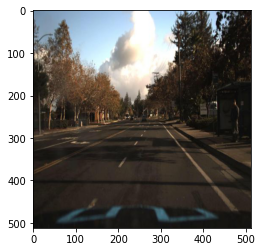

In [ ]:
imgplot = plt.imshow(img)

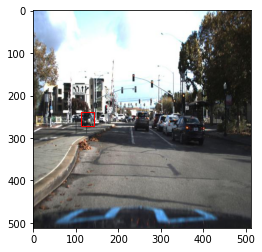

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from PIL import Image

bounds = boxes.loc[boxes['filename'] == '1478020419204218613_jpg.rf.57f5ed4c26679575f4684500b69f4223.jpg']
box0 = bounds.iloc[0]
box1 = bounds.iloc[1]
box2 = bounds.iloc[2]
box3 = bounds.iloc[3]

# Display the image
plt.imshow(Image.open('/content/export/1478020419204218613_jpg.rf.57f5ed4c26679575f4684500b69f4223.jpg'))

# Add the patch to the Axes
plt.gca().add_patch(Rectangle((box0['xmin'],box0['ymin']),box0['xmax'] - box0['xmin'],box0['ymax'] - box0['ymin'],linewidth=1,edgecolor='r',facecolor='none'))


In [ ]:
bounds = boxes.loc[boxes['filename'] == '1478020419204218613_jpg.rf.57f5ed4c26679575f4684500b69f4223.jpg']


bounds

,filename,width,height,class,xmin,ymin,xmax,ymax
89854,1478020419204218613_jpg.rf.57f5ed4c26679575f46...,512,512,car,113,240,143,271
89855,1478020419204218613_jpg.rf.57f5ed4c26679575f46...,512,512,car,153,244,178,266
89856,1478020419204218613_jpg.rf.57f5ed4c26679575f46...,512,512,car,154,246,179,270
89857,1478020419204218613_jpg.rf.57f5ed4c26679575f46...,512,512,trafficLight-Red,166,219,179,249
89858,1478020419204218613_jpg.rf.57f5ed4c26679575f46...,512,512,trafficLight-Red,167,216,176,242
89859,1478020419204218613_jpg.rf.57f5ed4c26679575f46...,512,512,car,185,240,216,260
89860,1478020419204218613_jpg.rf.57f5ed4c26679575f46...,512,512,car,211,245,235,270
89861,1478020419204218613_jpg.rf.57f5ed4c26679575f46...,512,512,car,213,244,232,265
89862,1478020419204218613_jpg.rf.57f5ed4c26679575f46...,512,512,trafficLight-Red,231,148,239,166
89863,1478020419204218613_jpg.rf.57f5ed4c26679575f46...,512,512,trafficLight-RedLeft,231,149,239,169


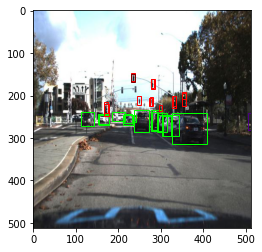

In [ ]:
def draw_with_bounding_box(filename,boxes):
  plt.imshow(Image.open('/content/export/' + filename))
  bounds = boxes.loc[boxes['filename'] == filename]
  colors = {'car': 'lime',
            'pedestrian':'indigo',
            'trafficLight-Red':'red',
            'trafficLight-Green':'seagreen',
            'truck':'mediumpurple',
            'trafficLight':'oragnered',
            'biker':'mediumslateblue',
            'trafficLight-RedLeft':'maroon',
            'trafficLight-GreenLeft':'lawngreen',
            'trafficLight-Yello':'yellow',
            'trafficLight-YelloLeft':'khaki'}
  for i in range(len(bounds)):
    box = bounds.iloc[i]
    plt.gca().add_patch(Rectangle((box['xmin'],box['ymin']),
                                  box['xmax'] - box['xmin'],
                                  box['ymax'] - box['ymin'],
                                  linewidth=1,edgecolor=colors[box['class']],facecolor='none'))
   

draw_with_bounding_box('1478020419204218613_jpg.rf.57f5ed4c26679575f4684500b69f4223.jpg',boxes)




In [40]:
from numpy import asarray
import os
def load_imgs(path):
  data = np.empty((512,512,3))
  for filename in os.listdir(path):
    if filename.endswith(".jpg"):
      temp = mpimg.imread('/content/export/'+filename)
      #print(filename)

load_imgs('/content/export')


In [ ]:
batch_size = 32
img_height = 512
img_width = 512